# Tutorial on ProfileHistogram

In [1]:
from matplotlib import pyplot as plt
import poisson_approval as pa

## Profile

Generate a random profile:

In [2]:
generator_profile = pa.GeneratorProfileHistogramUniform(n_bins = 10)
profile = generator_profile()
profile

<abc: 0.31940399911542217 [0.03340653 0.02494483 0.18242203 0.03682195 0.20987292 0.02334427
 0.12095651 0.12115266 0.18011325 0.06696504], acb: 0.005267175437959626 [0.05150034 0.18316242 0.18744234 0.05809651 0.1414941  0.01954361
 0.04828263 0.21202277 0.03810586 0.06034941], bac: 0.17275395344632694 [0.02936035 0.20809467 0.09604637 0.15236373 0.12469955 0.03718465
 0.11694644 0.00111251 0.11398311 0.12020863], bca: 0.14219056540096153 [0.10581035 0.05398215 0.13154593 0.03090519 0.01878133 0.00729383
 0.09377379 0.18935815 0.04627423 0.32227505], cab: 0.08978515199494652 [0.01612972 0.07069114 0.05909521 0.33914493 0.02093557 0.15706793
 0.0789563  0.10616104 0.03486792 0.11695024], cba: 0.2705991546043832 [0.19495041 0.08306723 0.18484951 0.01858965 0.12583274 0.10498021
 0.13267619 0.04766941 0.10449713 0.00288752]> (Condorcet winner: b)

Share of each ranking:

In [3]:
profile.d_ranking_share

{abc: 0.31940399911542217, acb: 0.005267175437959626, bac: 0.17275395344632694, bca: 0.14219056540096153, cab: 0.08978515199494652, cba: 0.2705991546043832}

Distribution of the utilities for voters $abc$:

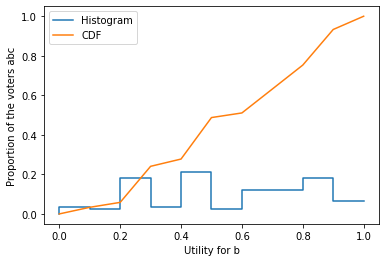

In [4]:
ranking = 'abc'
profile.plot_histogram(ranking, label='Histogram')
profile.plot_cdf(ranking, label='CDF')
plt.ylabel('Proportion of the voters %s' % ranking)
plt.legend()

## Strategic Analysis

Generate a random strategy:

In [5]:
generator_strategy = pa.GeneratorStrategyThresholdUniform()
strategy = generator_strategy()
strategy

<abc: utility-dependent (0.18661598316672723), acb: utility-dependent (0.9031943301421561), bac: utility-dependent (0.7264927885534525), bca: utility-dependent (0.23645818839506116), cab: utility-dependent (0.11645792884395323), cba: utility-dependent (0.1488164472785607)>

Tau vector (ballot shares) associated to the strategy in the given profile:

In [6]:
tau = profile.tau(strategy)
tau

<a: 0.022530749503337236, ab: 0.3424315294984674, ac: 0.08760007267812457, b: 0.1616954720543872, bc: 0.3195230411513664, c: 0.06621913511431715> ==> b

Is the strategy an equilibrium for the given profile?

In [7]:
profile.is_equilibrium(strategy)

EquilibriumStatus.NOT_EQUILIBRIUM

Use iterated voting to search for an equilibrium:

In [8]:
result = profile.iterated_voting_taus(strategy_ini=strategy, n_max_episodes=1000, 
                                      update_ratio=0.1, verbose=True)
cycle_taus = result['cycle_taus']
responses = result['responses']

-1
<a: 0.022530749503337236, ab: 0.3424315294984674, ac: 0.08760007267812457, b: 0.1616954720543872, bc: 0.3195230411513664, c: 0.06621913511431715> ==> b
0
<a: 0.020277674553003514, ab: 0.3401287764601629, ac: 0.08834529815360273, b: 0.17702037673367732, bc: 0.2875707370362298, c: 0.08665713706332376> ==> b
1
<a: 0.018249907097703164, ab: 0.3380562987256888, ac: 0.08901600108153307, b: 0.19081279094503845, bc: 0.25881366333260686, c: 0.1050513388174297> ==> b
2
<a: 0.016424916387932847, ab: 0.3361910687646622, ac: 0.08961963371667038, b: 0.20322596373526347, bc: 0.23293229699934617, c: 0.12160612039612506> ==> b
3
<a: 0.014782424749139562, ab: 0.33451236179973826, ac: 0.09016290308829396, b: 0.21439781924646598, bc: 0.20963906729941156, c: 0.13650542381695088> ==> b
4
<a: 0.013304182274225605, ab: 0.3330015255313067, ac: 0.09065184552275518, b: 0.22445248920654823, bc: 0.18867516056947042, c: 0.14991479689569412> ==> b
5
<a: 0.011973764046803045, ab: 0.33164177288971824, ac: 0.0910918

87
<a: 2.1189293168517947e-06, ab: 0.3194061647650479, ac: 0.09505162657734541, b: 0.3149301063707757, bc: 3.0049898659828874e-05, c: 0.27057993345885456> ==> b
88
<a: 1.9070363851666153e-06, ab: 0.3194059482000854, ac: 0.09505169666290147, b: 0.31493154761842695, bc: 2.7044908793845988e-05, c: 0.2705818555734074> ==> b
89
<a: 1.7163327466499538e-06, ab: 0.3194057532916191, ac: 0.09505175973990194, b: 0.3149328447413131, bc: 2.434041791446139e-05, c: 0.270583585476505> ==> b
90
<a: 1.5446994719849584e-06, ab: 0.3194055778739994, ac: 0.09505181650920236, b: 0.31493401215191064, bc: 2.190637612301525e-05, c: 0.2705851423892929> ==> b
91
<a: 1.3902295247864627e-06, ab: 0.3194054199981417, ac: 0.09505186760157273, b: 0.3149350628214484, bc: 1.9715738510713727e-05, c: 0.2705865436108019> ==> b
92
<a: 1.2512065723078165e-06, ab: 0.3194052779098698, ac: 0.09505191358470608, b: 0.3149360084240324, bc: 1.7744164659642354e-05, c: 0.2705878047101601> ==> b
93
<a: 1.1260859150770348e-06, ab: 0.319

177
<ab: 0.31940399928039587, ac: 0.09505232737951683, b: 0.3149445177493841, bc: 2.289121588952803e-09, c: 0.2705991531401675> ==> b
178
<ab: 0.3194039992638985, ac: 0.09505232738485576, b: 0.3149445178591745, bc: 2.0602094300575226e-09, c: 0.2705991532865891> ==> b
179
<ab: 0.3194039992490509, ac: 0.0950523273896608, b: 0.3149445179579859, bc: 1.8541884870517704e-09, c: 0.27059915341836854> ==> b
180
<ab: 0.319403999235688, ac: 0.09505232739398534, b: 0.31494451804691614, bc: 1.6687696383465934e-09, c: 0.27059915353697> ==> b
181
<ab: 0.31940399922366147, ac: 0.09505232739787742, b: 0.31494451812695334, bc: 1.5018926745119342e-09, c: 0.27059915364371134> ==> b
182
<ab: 0.3194039992128376, ac: 0.0950523274013803, b: 0.31494451819898683, bc: 1.3517034070607408e-09, c: 0.27059915373977855> ==> b
183
<ab: 0.3194039992030961, ac: 0.09505232740453289, b: 0.314944518263817, bc: 1.2165330663546667e-09, c: 0.27059915382623906> ==> b
184
<ab: 0.3194039991943287, ac: 0.09505232740737021, b: 0.3

<ab: 0.31940399911549466, ac: 0.09505232743291982, b: 0.3149445188472635, c: 0.2705991546043223> ==> b
268
<ab: 0.31940399911548745, ac: 0.09505232743291844, b: 0.314944518847266, c: 0.27059915460432843> ==> b
269
<ab: 0.31940399911548095, ac: 0.09505232743291721, b: 0.3149445188472682, c: 0.2705991546043339> ==> b
270
<ab: 0.3194039991154751, ac: 0.0950523274329161, b: 0.3149445188472702, c: 0.27059915460433887> ==> b
271
<ab: 0.31940399911546985, ac: 0.0950523274329151, b: 0.31494451884727204, c: 0.2705991546043433> ==> b
272
<ab: 0.31940399911546513, ac: 0.0950523274329142, b: 0.31494451884727365, c: 0.2705991546043473> ==> b
273
<ab: 0.31940399911546086, ac: 0.09505232743291339, b: 0.3149445188472751, c: 0.2705991546043509> ==> b
274
<ab: 0.319403999115457, ac: 0.09505232743291267, b: 0.3149445188472764, c: 0.27059915460435413> ==> b
275
<ab: 0.3194039991154536, ac: 0.09505232743291202, b: 0.3149445188472776, c: 0.2705991546043571> ==> b
276
<ab: 0.3194039991154505, ac: 0.095052327

In [9]:
cycle_taus

[<ab: 0.3194039991154227, ac: 0.0950523274329062, b: 0.3149445188472881, c: 0.2705991546043831> ==> b]

In [10]:
if len(cycle_taus) == 0:
    print('No convergence.')
elif len(cycle_taus) == 1:
    print('Convergence to an equilibrium.')
    print('Limit strategy: %s' % responses[0])
    print('Limit tau-vector: %s' % cycle_taus[0])
else:
    print('Convergence to a cycle of cardinality %s.' % len(cycle_taus))

Convergence to an equilibrium.
Limit strategy: <abc: ab, acb: ac, bac: b, bca: b, cab: ac, cba: c>
Limit tau-vector: <ab: 0.3194039991154227, ac: 0.0950523274329062, b: 0.3149445188472881, c: 0.2705991546043831> ==> b


There is another version of iterated voting, ``iterated_voting_strategies``, which is based on strategy update, whereas ``iterated_voting_taus`` is based on tau update (cf. Reference section). In principle, it may not lead to the same result, but it often does.

In [11]:
result = profile.iterated_voting_strategies(strategy_ini=strategy, n_max_episodes=1000, 
                                            update_ratio=0.1, verbose=True)
cycle_taus = result['cycle_taus']
responses = result['responses']

-1
<abc: utility-dependent (0.18661598316672723), acb: utility-dependent (0.9031943301421561), bac: utility-dependent (0.7264927885534525), bca: utility-dependent (0.23645818839506116), cab: utility-dependent (0.11645792884395323), cba: utility-dependent (0.1488164472785607)> ==> b
0
<abc: utility-dependent (0.1679543848500545), acb: utility-dependent (0.8128748971279405), bac: utility-dependent (0.7538435096981072), bca: utility-dependent (0.312812369555555), cab: utility-dependent (0.1048121359595579), cba: utility-dependent (0.23393480255070465)> ==> b
1
<abc: utility-dependent (0.15115894636504906), acb: utility-dependent (0.7315874074151465), bac: utility-dependent (0.7784591587282965), bca: utility-dependent (0.3815311325999995), cab: utility-dependent (0.09433092236360212), cba: utility-dependent (0.3105413222956342)> ==> b
2
<abc: utility-dependent (0.13604305172854417), acb: utility-dependent (0.6584286666736319), bac: utility-dependent (0.8006132428554669), bca: utility-depen

29
<abc: utility-dependent (0.007910867679105824), acb: utility-dependent (0.038287453802334045), bac: utility-dependent (0.9884057125101563), bca: utility-dependent (0.9676325782145098), cab: utility-dependent (0.004936786494027891), cba: utility-dependent (0.9639173432953246)> ==> b
30
<abc: utility-dependent (0.007119780911195242), acb: utility-dependent (0.034458708422100644), bac: utility-dependent (0.9895651412591406), bca: utility-dependent (0.9708693203930587), cab: utility-dependent (0.004443107844625102), cba: utility-dependent (0.9675256089657922)> ==> b
31
<abc: utility-dependent (0.006407802820075718), acb: utility-dependent (0.03101283757989058), bac: utility-dependent (0.9906086271332266), bca: utility-dependent (0.9737823883537529), cab: utility-dependent (0.003998797060162591), cba: utility-dependent (0.9707730480692129)> ==> b
32
<abc: utility-dependent (0.005767022538068147), acb: utility-dependent (0.027911553821901525), bac: utility-dependent (0.991547764419904), b

68
<abc: utility-dependent (0.00012992178792226846), acb: utility-dependent (0.0006288026364198725), bac: utility-dependent (0.9998095846598036), bca: utility-dependent (0.9994684232527472), cab: utility-dependent (8.107784808342401e-05), cba: utility-dependent (0.9994074071944803)> ==> b
69
<abc: utility-dependent (0.00011692960913004162), acb: utility-dependent (0.0005659223727778852), bac: utility-dependent (0.9998286261938233), bca: utility-dependent (0.9995215809274725), cab: utility-dependent (7.297006327508161e-05), cba: utility-dependent (0.9994666664750322)> ==> b
70
<abc: utility-dependent (0.00010523664821703745), acb: utility-dependent (0.0005093301355000967), bac: utility-dependent (0.999845763574441), bca: utility-dependent (0.9995694228347252), cab: utility-dependent (6.567305694757345e-05), cba: utility-dependent (0.999519999827529)> ==> b
71
<abc: utility-dependent (9.471298339533371e-05), acb: utility-dependent (0.00045839712195008705), bac: utility-dependent (0.99986

108
<abc: utility-dependent (1.9203587388209434e-06), acb: utility-dependent (9.294258162187597e-06), bac: utility-dependent (0.9999971854931462), bca: utility-dependent (0.9999921428263243), cab: utility-dependent (1.1984021816645088e-06), cba: utility-dependent (0.9999912409551096)> ==> b
109
<abc: utility-dependent (1.7283228649388492e-06), acb: utility-dependent (8.364832345968838e-06), bac: utility-dependent (0.9999974669438316), bca: utility-dependent (0.9999929285436919), cab: utility-dependent (1.078561963498058e-06), cba: utility-dependent (0.9999921168595987)> ==> b
110
<abc: utility-dependent (1.5554905784449643e-06), acb: utility-dependent (7.5283491113719546e-06), bac: utility-dependent (0.9999977202494484), bca: utility-dependent (0.9999936356893228), cab: utility-dependent (9.707057671482523e-07), cba: utility-dependent (0.9999929051736388)> ==> b
111
<abc: utility-dependent (1.399941520600468e-06), acb: utility-dependent (6.775514200234759e-06), bac: utility-dependent (

142
<abc: utility-dependent (5.341062831823919e-08), acb: utility-dependent (2.584997053723142e-07), bac: utility-dependent (0.9999999217205741), bca: utility-dependent (0.9999997814696938), cab: utility-dependent (3.3330966869215865e-08), cba: utility-dependent (0.9999997563860952)> ==> b
143
<abc: utility-dependent (4.806956548641527e-08), acb: utility-dependent (2.326497348350828e-07), bac: utility-dependent (0.9999999295485167), bca: utility-dependent (0.9999998033227244), cab: utility-dependent (2.999787018229428e-08), cba: utility-dependent (0.9999997807474856)> ==> b
144
<abc: utility-dependent (4.326260893777374e-08), acb: utility-dependent (2.0938476135157452e-07), bac: utility-dependent (0.999999936593665), bca: utility-dependent (0.999999822990452), cab: utility-dependent (2.6998083164064854e-08), cba: utility-dependent (0.999999802672737)> ==> b
145
<abc: utility-dependent (3.893634804399637e-08), acb: utility-dependent (1.8844628521641707e-07), bac: utility-dependent (0.99

185
<abc: ab, acb: utility-dependent (2.785402482532059e-09), bac: b, bca: utility-dependent (0.9999999976452782), cab: ac, cba: utility-dependent (0.9999999973749958)> ==> b
186
<abc: ab, acb: utility-dependent (2.506862234278853e-09), bac: b, bca: utility-dependent (0.9999999978807504), cab: ac, cba: utility-dependent (0.9999999976374963)> ==> b
187
<abc: ab, acb: utility-dependent (2.256176010850968e-09), bac: b, bca: utility-dependent (0.9999999980926754), cab: ac, cba: utility-dependent (0.9999999978737466)> ==> b
188
<abc: ab, acb: utility-dependent (2.0305584097658713e-09), bac: b, bca: utility-dependent (0.9999999982834078), cab: ac, cba: utility-dependent (0.999999998086372)> ==> b
189
<abc: ab, acb: utility-dependent (1.8275025687892843e-09), bac: b, bca: utility-dependent (0.999999998455067), cab: ac, cba: utility-dependent (0.9999999982777348)> ==> b
190
<abc: ab, acb: utility-dependent (1.644752311910356e-09), bac: b, bca: utility-dependent (0.9999999986095603), cab: ac, c

In [12]:
cycle_taus

[<ab: 0.31940399911542217, ac: 0.09505232743290615, b: 0.31494451884728847, c: 0.2705991546043832> ==> b]

In [13]:
if len(cycle_taus) == 0:
    print('No convergence.')
elif len(cycle_taus) == 1:
    print('Convergence to an equilibrium.')
    print('Limit strategy: %s' % responses[0])
    print('Limit tau-vector: %s' % cycle_taus[0])
else:
    print('Convergence to a cycle of cardinality %s.' % len(cycle_taus))

Convergence to an equilibrium.
Limit strategy: <abc: ab, acb: ac, bac: b, bca: b, cab: ac, cba: c>
Limit tau-vector: <ab: 0.31940399911542217, ac: 0.09505232743290615, b: 0.31494451884728847, c: 0.2705991546043832> ==> b
